### Prototype: Statistical Analysis Phase

# Correlations between demographic and socio-economic factors and incidence of Covid 19 infection and mortality in U.S. Counties

#### Objectives
1. Gain a greater understanding of the relationship between race/ethnicity, gender, poverty and severe health conditions and Covid 19 morbidity and mortality.
2. Apply skills recently acquired via Data Science skills to advocacy that addresses health indisparities.

#### Method
From previous step:
1. Source data on race/ethnicity, gender, poverty and severe health conditions and Covid 19 morbidity and mortality at the U.S county level
2. Clean and pre-process data according to unique identifiers

In this step:
3. Conduct exploratory data analysis
4. Test hypothesis that no relationship exists between features using statistical regression (Ordinary Least Squares).
5. Articulate conclusions and next steps for Statistical Analysis Phase.

In the next step:
6. Test hypothesis that features with highest importance are unable to predict Covid 19 morbidity and mortality using machine learning (Random Forest).
7. Visualise findings: a) Highly correlated features and possible Simpsons Paradox; b) outcomes of machine learning.
8. Articulate conclusions and next steps for Machine Learning Phase

### Acknowledgments
- Thanks to my instructors Andrew Worsely, Lydia Peabody, the team at General Assembly and my peers in GA Data Science June-August 2020.
- Julian Hatwell

First step was to create a correlation matrix of the features. All numeric features are log transformed. 

In [2]:
import pandas as pd

all_data_5 = pd.read_csv("data/covid_data_log_200908.csv")

In [3]:
all_data_5.corr()

,FIPS,stateFIPS,countyFIPS_2d,Cases,Deaths,Poverty,Population,W_Male,W_Female,B_Male,B_Female,I_Male,I_Female,A_Male,A_Female,NH_Male,NH_Female,Risk_Index
FIPS,1.000000,0.999975,0.172145,-0.077418,-0.094983,-0.029532,-0.027460,-0.005085,-0.002671,-0.073047,-0.075860,-0.004443,-0.003757,-0.046871,-0.043429,-0.067457,-0.063514,-0.057188
stateFIPS,0.999975,1.000000,0.165240,-0.077401,-0.094913,-0.029016,-0.026971,-0.004482,-0.002082,-0.073395,-0.076283,-0.003729,-0.003025,-0.046640,-0.043193,-0.067101,-0.063143,-0.057497
countyFIPS_2d,0.172145,0.165240,1.000000,-0.015464,-0.025916,-0.077585,-0.073370,-0.085662,-0.083333,0.036569,0.046673,-0.101119,-0.103581,-0.040380,-0.040465,-0.061469,-0.062938,0.033805
Cases,-0.077418,-0.077401,-0.015464,1.000000,0.831404,0.863333,0.870442,0.830109,0.829317,0.855902,0.854359,0.675372,0.672780,0.821229,0.816102,0.773864,0.768634,-0.147728
Deaths,-0.094983,-0.094913,-0.025916,0.831404,1.000000,0.752192,0.753452,0.707211,0.707504,0.767904,0.777835,0.567649,0.572033,0.714703,0.710788,0.665688,0.668661,-0.109679
Poverty,-0.029532,-0.029016,-0.077585,0.863333,0.752192,1.000000,0.994726,0.977495,0.977334,0.840801,0.835874,0.811566,0.812330,0.941105,0.948649,0.893172,0.896652,-0.271954
Population,-0.027460,-0.026971,-0.073370,0.870442,0.753452,0.994726,1.000000,0.983873,0.982604,0.849985,0.840931,0.816265,0.815136,0.943148,0.950443,0.891949,0.894597,-0.270748
W_Male,-0.005085,-0.004482,-0.085662,0.830109,0.707211,0.977495,0.983873,1.000000,0.998602,0.782062,0.767795,0.785402,0.782802,0.921671,0.932434,0.873083,0.876733,-0.316735
W_Female,-0.002671,-0.002082,-0.083333,0.829317,0.707504,0.977334,0.982604,0.998602,1.000000,0.778496,0.768960,0.777178,0.776519,0.916457,0.928951,0.867349,0.872161,-0.306520
B_Male,-0.073047,-0.073395,0.036569,0.855902,0.767904,0.840801,0.849985,0.782062,0.778496,1.000000,0.980966,0.643079,0.637336,0.817367,0.804058,0.758753,0.758668,-0.036136


In [4]:
all_data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FIPS           3142 non-null   int64  
 1   stateFIPS      3142 non-null   int64  
 2   countyFIPS_2d  3142 non-null   int64  
 3   County         3142 non-null   object 
 4   State          3142 non-null   object 
 5   Cases          3142 non-null   float64
 6   Deaths         3142 non-null   float64
 7   Poverty        3142 non-null   float64
 8   Population     3142 non-null   float64
 9   W_Male         3142 non-null   float64
 10  W_Female       3142 non-null   float64
 11  B_Male         3142 non-null   float64
 12  B_Female       3142 non-null   float64
 13  I_Male         3142 non-null   float64
 14  I_Female       3142 non-null   float64
 15  A_Male         3142 non-null   float64
 16  A_Female       3142 non-null   float64
 17  NH_Male        3142 non-null   float64
 18  NH_Femal

Next step was to visualise the correlations

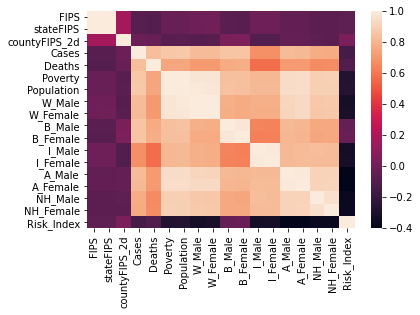

In [5]:
import seaborn as sns
sns.heatmap(all_data_5.corr())

#### Heatmap 1. Feature Correlations

A negative correlation was identified between 'Cases' and 'Risk Index' prompting the need to validate.

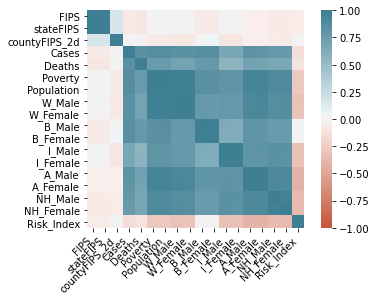

In [6]:
corr = all_data_5.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Heatmap 2. Feature Correlations

A comparison heatmap was made for visual validation purposes.

### Observations for further investigation

1. An inverse relationship between Risk Index and Cases/Deaths seems to be inverse
2. Cases and Deaths seem to be highly correlated
3. Deaths and Black Populations (Male & Female) seem to be highly correlated

Side note: Poverty seems to be perfectly correlated with White Populations (Male & Female), likely due to population.

### Evaluating Distribution of Risk Index Feature

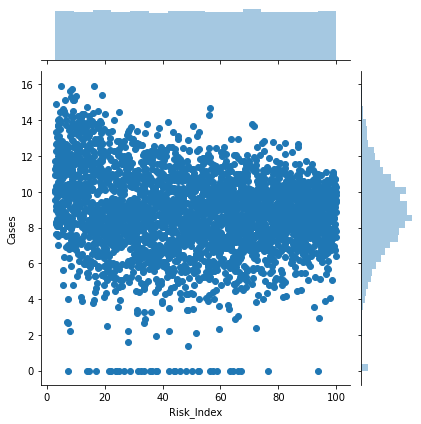

In [7]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["Cases"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["Cases"], data=all_data_5);


#### Plot 1. x = Risk Index (%; log); y = Cases (log)

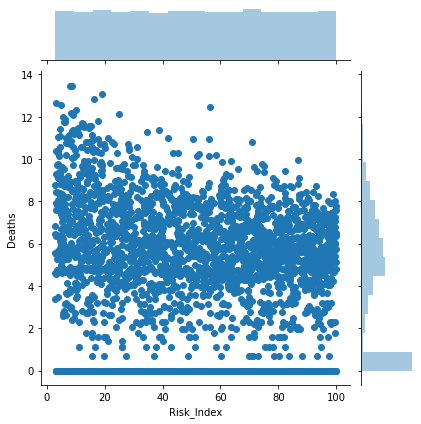

In [8]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["Deaths"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["Deaths"], data=all_data_5);

#### Plot 2. x = Risk Index (%; log); y = Deaths (log)

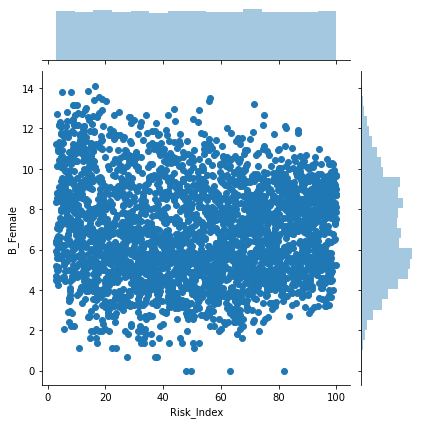

In [9]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["B_Female"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["B_Female"], data=all_data_5);

#### Plot 3. x = Risk Index (%; log); y = Black Females (log)

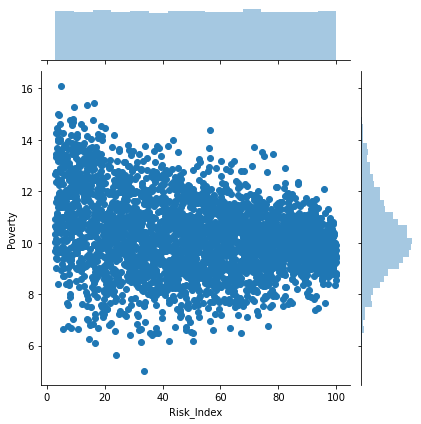

In [10]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["Poverty"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["Poverty"], data=all_data_5);

#### Plot 4. x = Risk Index (%; log); y = Poverty (log)

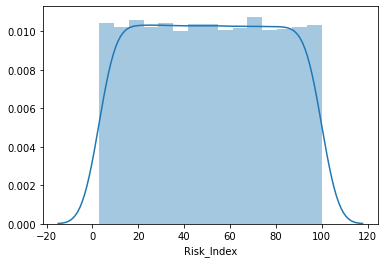

In [11]:
sns.distplot(all_data_5["Risk_Index"]);

#### Histogram 1. x = Risk Index (%; log)

In [12]:
all_data_5.loc[:,["Risk_Index"]].describe()

,Risk_Index
count,3142.000000
mean,51.318329
std,28.058961
min,2.850000
25%,27.130000
50%,51.380000
75%,75.470000
max,100.000000


### Evaluating the relationship between Cases and Risk Index

#### OLS Regression (Cases / Risk Index (log) only)

Given the inverse relation between Cases and Risk Index illustrated in Heatmap 1, further investigation into the relationships between the features was required.

In [15]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [16]:
fit_cases_v5 = smf.ols("Cases ~ Risk_Index", data=all_data_5).fit()

fit_cases_v5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     70.05
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           8.57e-17
Time:                        13:48:23   Log-Likelihood:                -7091.9
No. Observations:                3142   AIC:                         1.419e+04
Df Residuals:                    3140   BIC:                         1.420e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4457      0.086    109.807      0.000       9.277       9.614
Risk_Index    -0.0123      0.001     -8.370      0.000      -0.015      -0.009
==============================================================================
Omnibus:                      318.381   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              608.583
Skew:                          -0.668   Prob(JB):                    7.05e-133
Kurtosis:                       4.693   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 1.419e+04; R-Squared: 0.022

In order to build a boxplot parameters needed to be parsed from the OLS analysis.

In [17]:
fit_cases_v5.params

Intercept     9.445743
Risk_Index   -0.012310
dtype: float64

Confidence intervals also needed to be parsed  

In [18]:
fit_cases_v5.conf_int()

,0,1
Intercept,9.277080,9.614406
Risk_Index,-0.015194,-0.009427


The error series was calculated between the parameters and confidence intervals

In [19]:
err_series = fit_cases_v5.params - fit_cases_v5.conf_int()[0]
err_series

Intercept     0.168663
Risk_Index    0.002884
dtype: float64

A table was build from which a boxplot was rendered.

In [20]:
coef_df = pd.DataFrame({'coef': fit_cases_v5.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df

,coef,err,varname
0,-0.01231,0.002884,Risk_Index


#### Boxplot 1. Coefficent Plot Cases / Risk Index (log)

<ipython-input-21-b5a7cddeee30>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


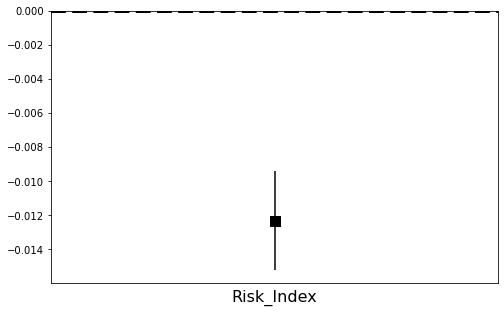

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Risk_Index'], 
                       rotation=0, fontsize=16)

### Evaluating Morbidity (Cases)

A series of regressions were run with different feature combinations for evaluation and comparision purposes. Models were compared based on the statistical significance of features, plus AIC and R-Square.

#### Table. Risk Index Data Summary

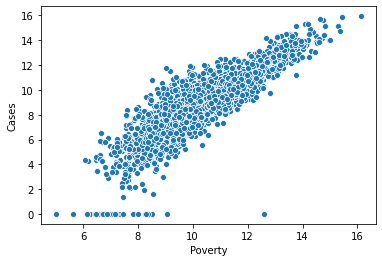

In [22]:
sns.scatterplot(all_data_5["Poverty"], all_data_5["Cases"])

#### Plot 5. x = Poverty (log); y = Cases (log)

#### OLS Regression (Cases / Poverty (log) only)

In [23]:
fit1 = smf.ols("Cases ~ Poverty", data=all_data_5).fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     9190.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:48:44   Log-Likelihood:                -4977.7
No. Observations:                3142   AIC:                             9959.
Df Residuals:                    3140   BIC:                             9971.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0097      0.146    -34.377      0.000      -5.295      -4.724
Poverty        1.3498      0.014     95.867      0.000       1.322       1.377
==============================================================================
Omnibus:                      694.603   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5244.404
Skew:                          -0.843   Prob(JB):                         0.00
Kurtosis:                       9.101   Cond. No.                         72.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 9959; R-Squared: 0.745

#### Plot 6. Residual analysis: Cases ~ Poverty (log)

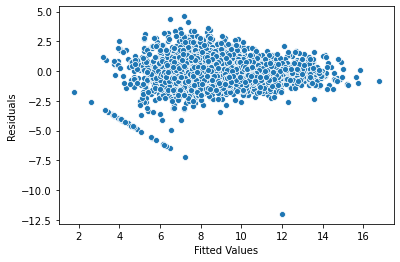

In [24]:
sns.scatterplot(fit1.fittedvalues, fit1.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

#### OLS Regression (All Features (log) Approach)

In [25]:
fit_all = smf.ols("Cases ~ Poverty + Population + W_Male + W_Female + B_Male + B_Female + I_Male + I_Female + A_Male + A_Female + NH_Male + NH_Female + Risk_Index", data=all_data_5).fit()

fit_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1049.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:48:47   Log-Likelihood:                -4489.3
No. Observations:                3142   AIC:                             9007.
Df Residuals:                    3128   BIC:                             9091.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4248      0.321    -10.664      0.000      -4.054      -2.795
Poverty       -0.2552      0.125     -2.045      0.041      -0.500      -0.011
Population     1.5773      0.182      8.649      0.000       1.220       1.935
W_Male        -0.3276      0.298     -1.101      0.271      -0.911       0.256
W_Female       0.0644      0.277      0.233      0.816      -0.479       0.608
B_Male         0.0516      0.049      1.064      0.287      -0.044       0.147
B_Female       0.3229      0.046      7.073      0.000       0.233       0.412
I_Male         0.0998      0.086      1.164      0.245      -0.068       0.268
I_Female      -0.1612      0.084     -1.920      0.055      -0.326       0.003
A_Male         0.1637      0.054      3.021      0.003       0.057       0.270
A_Female      -0.3103      0.059     -5.260      0.000      -0.426      -0.195
NH_Male        0.1142      0.035      3.307      0.001       0.046       0.182
NH_Female     -0.0989      0.035     -2.812      0.005      -0.168      -0.030
Risk_Index    -0.0021      0.001     -2.383      0.017      -0.004      -0.000
==============================================================================
Omnibus:                      531.457   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2981.469
Skew:                          -0.683   Prob(JB):                         0.00
Kurtosis:                       7.572   Cond. No.                     1.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Note: AIC: 9007; R-Squared: 0.813

#### Plot 7. Residual analysis: All Features (log)

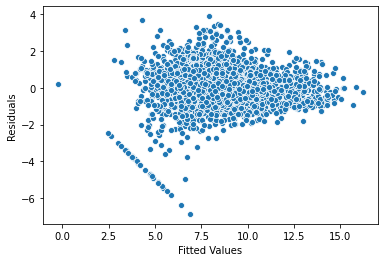

In [26]:
sns.scatterplot(fit_all.fittedvalues, fit_all.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

#### OLS Regression (Cases / White and Black Populations of Males and Females (log) only)

In [27]:
fit_cases_v1 = smf.ols("Cases ~ Poverty + W_Male + W_Female + B_Male + B_Female", data=all_data_5).fit()

fit_cases_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     2617.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:48:50   Log-Likelihood:                -4545.0
No. Observations:                3142   AIC:                             9102.
Df Residuals:                    3136   BIC:                             9138.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8462      0.169    -10.906      0.000      -2.178      -1.514
Poverty        0.4273      0.075      5.663      0.000       0.279       0.575
W_Male         0.4485      0.269      1.665      0.096      -0.080       0.976
W_Female      -0.1495      0.259     -0.577      0.564      -0.658       0.359
B_Male         0.1657      0.047      3.518      0.000       0.073       0.258
B_Female       0.3037      0.045      6.787      0.000       0.216       0.391
==============================================================================
Omnibus:                      568.279   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3166.251
Skew:                          -0.743   Prob(JB):                         0.00
Kurtosis:                       7.688   Cond. No.                         418.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 9102; R-Squared: 0.807

#### OLS Regression (Cases / Poverty & Black Populations, Male & Female (log) only)

In [28]:
fit_cases_v2 = smf.ols("Cases ~ Poverty + B_Male + B_Female", data=all_data_5).fit()

fit_cases_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     4328.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:48:52   Log-Likelihood:                -4555.5
No. Observations:                3142   AIC:                             9119.
Df Residuals:                    3138   BIC:                             9143.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9963      0.161    -12.403      0.000      -2.312      -1.681
Poverty        0.7518      0.023     32.869      0.000       0.707       0.797
B_Male         0.2077      0.042      4.992      0.000       0.126       0.289
B_Female       0.2374      0.039      6.126      0.000       0.161       0.313
==============================================================================
Omnibus:                      685.824   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4469.156
Skew:                          -0.874   Prob(JB):                         0.00
Kurtosis:                       8.575   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 9119; R-Squared: 0.805

#### OLS Regression (Cases / Poverty, Female Populations, White & Black (log) only)

In [29]:
fit_cases_v3 = smf.ols("Cases ~ Poverty + W_Female + B_Female", data=all_data_5).fit()

fit_cases_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     4318.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:48:53   Log-Likelihood:                -4558.3
No. Observations:                3142   AIC:                             9125.
Df Residuals:                    3138   BIC:                             9149.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7889      0.168    -10.674      0.000      -2.117      -1.460
Poverty        0.4623      0.074      6.210      0.000       0.316       0.608
W_Female       0.2781      0.063      4.395      0.000       0.154       0.402
B_Female       0.4456      0.015     29.751      0.000       0.416       0.475
==============================================================================
Omnibus:                      552.790   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3184.706
Skew:                          -0.708   Prob(JB):                         0.00
Kurtosis:                       7.724   Cond. No.                         154.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 9125; R-Squared: 0.805

#### Plot 6. Linear Regression Plot: Risk Index / Cases (log)

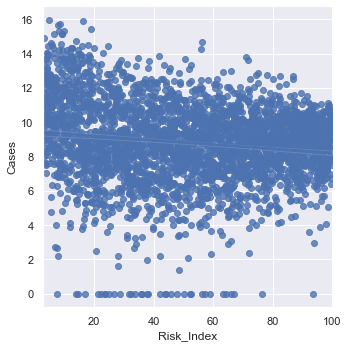

In [30]:
sns.set(color_codes=True)


sns.lmplot(x="Risk_Index", y="Cases", data=all_data_5);

In [31]:
fit_cases_v6 = smf.ols("Cases ~ W_Female + B_Female", data=all_data_5).fit()

fit_cases_v6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     6382.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:48:55   Log-Likelihood:                -4577.5
No. Observations:                3142   AIC:                             9161.
Df Residuals:                    3139   BIC:                             9179.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2315      0.142     -8.650      0.000      -1.511      -0.952
W_Female       0.6528      0.019     33.997      0.000       0.615       0.690
B_Female       0.5036      0.012     42.735      0.000       0.480       0.527
==============================================================================
Omnibus:                      483.303   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2798.518
Skew:                          -0.597   Prob(JB):                         0.00
Kurtosis:                       7.466   Cond. No.                         96.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 9161; R-Squared: 0.803

### Conclusion (Morbitity)

After evaluating features combinations across various regression models, the statistical model that evaluated Cases to Risk Index performed best in terms of AIC and R-Squared indicators. However, data from the Cases to Risk Index model revealed an inverse relationship, pointing to a potentialPossions Distribution. 

For example, while the data attempts to illustrate the distribution of Covid risk, the distribution of infection is not a constant. Epidemiological factors that determine the spread of infection are beyond the scope of this model.

### Evaluating Mortality (Deaths)

A series of regressions were run with different feature combinations for evaluation and comparision purposes. Models were compared based on the statistical significance of features, plus AIC and R-Square.

#### OLS Regression (Death / Poverty (log) only)

In [32]:
fit_deaths_v1 = smf.ols("Deaths ~ Poverty", data=all_data_5).fit()

fit_deaths_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     4092.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:48:56   Log-Likelihood:                -6837.9
No. Observations:                3142   AIC:                         1.368e+04
Df Residuals:                    3140   BIC:                         1.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4041      0.263    -47.088      0.000     -12.921     -11.888
Poverty        1.6280      0.025     63.965      0.000       1.578       1.678
==============================================================================
Omnibus:                       51.260   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.083
Skew:                          -0.272   Prob(JB):                     2.20e-11
Kurtosis:                       2.719   Cond. No.                         72.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 1.368e+04; R-squared: 0.566

#### OLS Regression (Death / Black Populations, Male & Female (log) only)

In [33]:
fit_deaths_v2 = smf.ols("Deaths ~ B_Male + B_Female", data=all_data_5).fit()

fit_deaths_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     2411.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:48:59   Log-Likelihood:                -6686.6
No. Observations:                3142   AIC:                         1.338e+04
Df Residuals:                    3139   BIC:                         1.340e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8996      0.123    -23.524      0.000      -3.141      -2.658
B_Male         0.1801      0.080      2.240      0.025       0.022       0.338
B_Female       0.8562      0.076     11.278      0.000       0.707       1.005
==============================================================================
Omnibus:                       13.838   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.570
Skew:                          -0.141   Prob(JB):                      0.00113
Kurtosis:                       2.846   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 1.338e+04; R-squared: 0.606

#### OLS Regression (Death / Cases & Poverty (log) only)

In [34]:
fit_deaths_v3 = smf.ols("Deaths ~ Cases + Poverty", data=all_data_5).fit()

fit_deaths_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     3591.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:49:00   Log-Likelihood:                -6278.4
No. Observations:                3142   AIC:                         1.256e+04
Df Residuals:                    3139   BIC:                         1.258e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4473      0.259    -28.789      0.000      -7.954      -6.940
Cases          0.9895      0.027     36.644      0.000       0.937       1.042
Poverty        0.2925      0.042      6.928      0.000       0.210       0.375
==============================================================================
Omnibus:                       57.643   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.707
Skew:                          -0.304   Prob(JB):                     2.42e-14
Kurtosis:                       3.332   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 1.256e+04; R-squared: 0.696

#### OLS Regression (Death / Cases & Risk Index (log) only)

In [35]:
fit_deaths_v4 = smf.ols("Deaths ~ Cases + Risk_Index", data=all_data_5).fit()

fit_deaths_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     3517.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:49:02   Log-Likelihood:                -6301.4
No. Observations:                3142   AIC:                         1.261e+04
Df Residuals:                    3139   BIC:                         1.263e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9791      0.147    -40.626      0.000      -6.268      -5.691
Cases          1.1537      0.014     83.131      0.000       1.126       1.181
Risk_Index     0.0016      0.001      1.340      0.180      -0.001       0.004
==============================================================================
Omnibus:                       63.223   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.605
Skew:                          -0.236   Prob(JB):                     9.48e-20
Kurtosis:                       3.668   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 1.261e+04; R-squared: 0.691

### Model 1: Death / Cases, Poverty, Black Populations - Males & Female

#### OLS Regression (Death / Cases, Poverty & Black Populations, Males & Female (log) only)

In [36]:
fit_deaths_v5 = smf.ols("Deaths ~ Cases + Poverty + B_Male + B_Female", data=all_data_5).fit()

fit_deaths_v5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1918.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:49:04   Log-Likelihood:                -6205.0
No. Observations:                3142   AIC:                         1.242e+04
Df Residuals:                    3137   BIC:                         1.245e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0509      0.279    -21.710      0.000      -6.597      -5.504
Cases          0.8306      0.030     27.521      0.000       0.771       0.890
Poverty        0.1173      0.045      2.617      0.009       0.029       0.205
B_Male        -0.2563      0.071     -3.628      0.000      -0.395      -0.118
B_Female       0.5266      0.066      7.990      0.000       0.397       0.656
==============================================================================
Omnibus:                       49.966   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.991
Skew:                          -0.308   Prob(JB):                     5.13e-12
Kurtosis:                       3.134   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 1.242e+04; R-squared: 0.710

### Coefficient Tree (Model 1)

Parse the parameters

In [37]:
fit_deaths_v5.params

Intercept   -6.050917
Cases        0.830609
Poverty      0.117345
B_Male      -0.256265
B_Female     0.526575
dtype: float64

Parse the confidence intervals

In [38]:
fit_deaths_v5.conf_int()

,0,1
Intercept,-6.597397,-5.504438
Cases,0.771433,0.889786
Poverty,0.029430,0.205260
B_Male,-0.394750,-0.117781
B_Female,0.397363,0.655788


Calculate error for each feature

In [39]:
err_series = fit_deaths_v5.params - fit_deaths_v5.conf_int()[0]
err_series

Intercept    0.546479
Cases        0.059177
Poverty      0.087915
B_Male       0.138484
B_Female     0.129212
dtype: float64

Create a dataframe from all the values

In [40]:
coef_df_v5 = pd.DataFrame({'coef': fit_deaths_v5.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df_v5

,coef,err,varname
0,0.830609,0.059177,Cases
1,0.117345,0.087915,Poverty
2,-0.256265,0.138484,B_Male
3,0.526575,0.129212,B_Female


The dataframe is then used to create plots

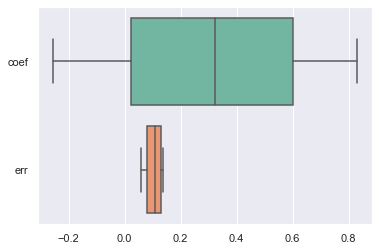

In [41]:
import seaborn as sns
sns.boxplot(data=coef_df_v5, orient="h", palette="Set2")

<ipython-input-42-693619b2b6c9>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


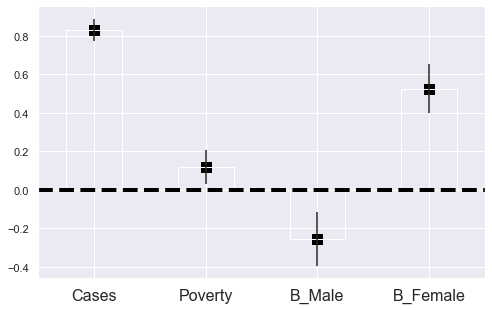

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df_v5.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df_v5['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Cases', 'Poverty', 'B_Male', 'B_Female'], 
                       rotation=0, fontsize=16)

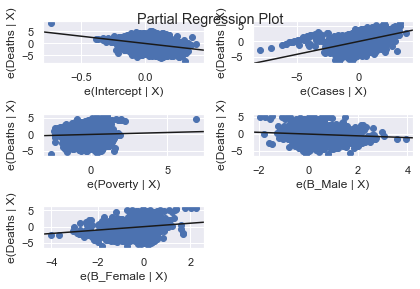

In [43]:
import statsmodels.api as sm

fig = sm.graphics.plot_partregress_grid(fit_deaths_v5)

### Model 2: Death / Cases, Risk Index, Black Populations - Males & Female

In [44]:
fit_deaths_v6 = smf.ols("Deaths ~ Cases + Risk_Index + B_Male + B_Female", data=all_data_5).fit()

fit_deaths_v6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1914.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:49:17   Log-Likelihood:                -6207.2
No. Observations:                3142   AIC:                         1.242e+04
Df Residuals:                    3137   BIC:                         1.245e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2769      0.154    -34.197      0.000      -5.580      -4.974
Cases          0.8607      0.027     32.074      0.000       0.808       0.913
Risk_Index    -0.0018      0.001     -1.534      0.125      -0.004       0.000
B_Male        -0.2375      0.070     -3.384      0.001      -0.375      -0.100
B_Female       0.5440      0.066      8.203      0.000       0.414       0.674
==============================================================================
Omnibus:                       47.432   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.297
Skew:                          -0.297   Prob(JB):                     1.97e-11
Kurtosis:                       3.154   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 1.242e+04; R-squared: 0.709

### Coefficient Tree (Model 2)

In order to create a visualisation of the coefficient data, coefficient parameters from the OLS summary must be parsed.

In [45]:
fit_deaths_v6.params

Intercept    -5.276949
Cases         0.860696
Risk_Index   -0.001761
B_Male       -0.237531
B_Female      0.543979
dtype: float64

Then cofidence intervals for each feature must be parsed

In [46]:
fit_deaths_v6.conf_int()

,0,1
Intercept,-5.579508,-4.974390
Cases,0.808081,0.913311
Risk_Index,-0.004011,0.000489
B_Male,-0.375157,-0.099905
B_Female,0.413949,0.674009


The error must be calculated for each feature

In [52]:
err_series = fit_deaths_v6.params - fit_deaths_v6.conf_int()[0]
err_series

Intercept     0.302559
Cases         0.052615
Risk_Index    0.002250
B_Male        0.137626
B_Female      0.130030
dtype: float64

A dataframe then needs to be created to hold all the resulting data

In [48]:
coef_df_v6 = pd.DataFrame({'coef': fit_deaths_v6.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df_v6

,coef,err,varname
0,0.860696,0.052615,Cases
1,-0.001761,0.002250,Risk_Index
2,-0.237531,0.137626,B_Male
3,0.543979,0.130030,B_Female


The dataframe is then used to create plots

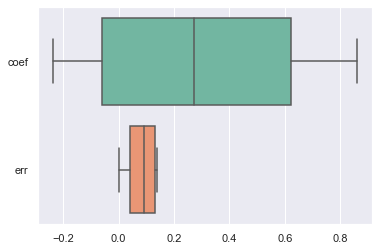

In [49]:
import seaborn as sns
sns.boxplot(data=coef_df_v6, orient="h", palette="Set2")

<ipython-input-50-1e489648bd50>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


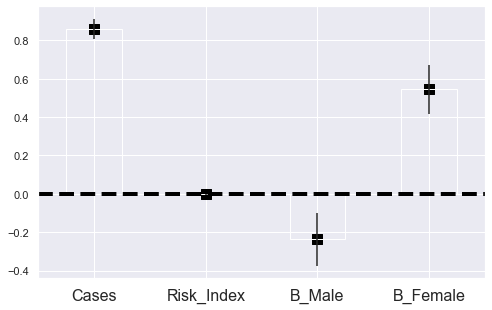

In [50]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df_v6.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df_v6['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Cases', 'Risk_Index', 'B_Male', 'B_Female'], 
                       rotation=0, fontsize=16)

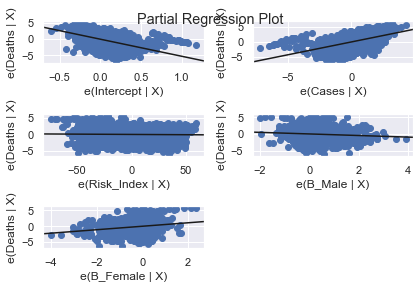

In [51]:
import statsmodels.api as sm

fig = sm.graphics.plot_partregress_grid(fit_deaths_v6)

### Conclusion (Mortality)

Poverty and Risk Index are virtually interchangable in their statistical significance to Covid 19 Deaths when Covid 19 Morbidity (Cases) and Black Population (Male & Female) are a constant.

# Next Steps (Statistical Analysis)

1. Create additional feature to identity counties according to racial, socioeconomic profile of majority populations (i.e. counties with majority black population, majority are persons living in poverty, etc).